# Classification Exercise:

Es tu momento. En la carpeta data tienes un dataset con las características de distintas setas y si son venenosas o comestibles. Realiza el preprocesamiento pertinente, separa el dataset como convenga y prueba con un par de modelos hasta encontrar uno que nos de buenos resultados. Recuerda que una falta de complejidad del modelo puede desembocar en un modelo con _underfit_, (scorings muy bajos, sobre el _60%_ o menos) y un exceso puede llevarnos al _overfit_ (scorings del 100%).

Una vez obtengas un resultado que te parezca bueno representa los mismos mediante una matriz de confunsión.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
# Nos traemos la base de datos:
df = pd.read_csv('/content/drive/MyDrive/mushrooms.csv')
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

,0
type,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [7]:
df.dtypes

,0
type,object
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [12]:
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
encoder = LabelEncoder()

df_encoded = df.copy()

In [63]:
for column in df_encoded.columns:
    print(f'Columna {column}, variables: {df[column].unique()}')

Columna type, variables: ['p' 'e']
Columna cap_shape, variables: ['x' 'b' 's' 'f' 'k' 'c']
Columna cap_surface, variables: ['s' 'y' 'f' 'g']
Columna cap_color, variables: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Columna bruises, variables: ['t' 'f']
Columna odor, variables: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Columna gill_attachment, variables: ['f' 'a']
Columna gill_spacing, variables: ['c' 'w']
Columna gill_size, variables: ['n' 'b']
Columna gill_color, variables: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Columna stalk_shape, variables: ['e' 't']
Columna stalk_root, variables: ['e' 'c' 'b' 'r' '?']
Columna stalk_surface_above_ring, variables: ['s' 'f' 'k' 'y']
Columna stalk_surface_below_ring, variables: ['s' 'f' 'y' 'k']
Columna stalk_color_above_ring, variables: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Columna stalk_color_below_ring, variables: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Columna veil_type, variables: ['p']
Columna veil_color, variables: ['w' 'n' 'o' 'y']
Columna 

In [21]:
for column in df_encoded.columns:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])

df_encoded.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [66]:
X = df_encoded.drop("type", axis=1)
y = df_encoded['type']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [68]:

arbol_decision_1 = DecisionTreeClassifier(max_depth=7)

In [69]:
arbol_decision_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [70]:
# Entrenado el modelo veamos lo bueno que es determinando el tipo de flores que tenemos dentro de la parte de test:
y_predict = arbol_decision_1.predict(X_test)

In [71]:
# Determinamos el accuracy del modelo:

arbol_decision_1.score(X_test, y_test)

1.0

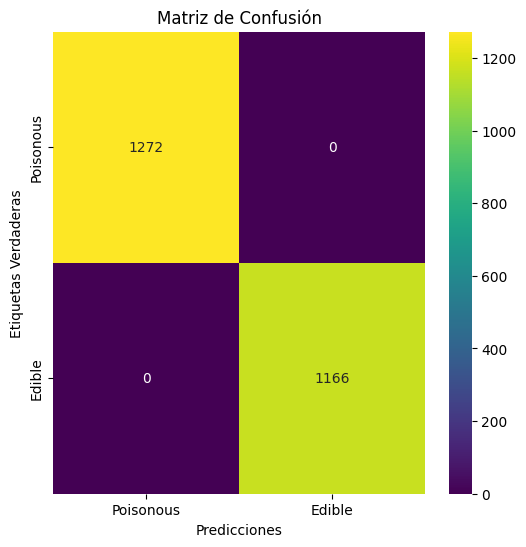

In [72]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Poisonous", "Edible"], yticklabels=["Poisonous", "Edible"])
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score

X = df_encoded.drop("type", axis=1)
y = df_encoded['type']

depths = range(1,21)
scores = []


for d in depths:
  model = DecisionTreeClassifier(max_depth=d)
  cv_score = cross_val_score(model, X, y, cv=5).mean()
  scores.append(cv_score)
'''
Esto hace validación cruzada con 5 folds:Divide el dataset en 5 partes iguales
Repite 5 veces:
Usa 4 partes para entrenar
Usa 1 parte para validar
Obtiene 5 scores (uno por fold)
'''

best_depth = depths[np.argmax(scores)]
print(f"El mejor valor de profundidad es: {best_depth}")
print("CV  score:", max(scores) )


El mejor valor de profundidad es: 7
CV  score: 0.9684832133383857


In [53]:

from sklearn.neighbors import KNeighborsClassifier # El KNN
# Probamos con el KNN con una sola medición:
knn_1 = KNeighborsClassifier(n_neighbors=1)

In [54]:
X = df_encoded.drop("type", axis=1)
y = df_encoded['type']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [56]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
y_predict = knn_1.predict(X_test)

In [57]:
knn_1.score(X_test, y_test)

0.9995898277276456

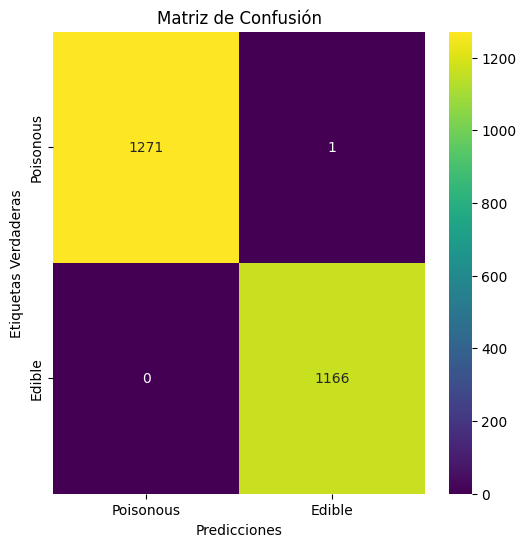

In [65]:
# La matriz de confusión nos permite comparar lo predicho por el modelo respecto a lo que sabemos que es cierto:

conf_matrix = confusion_matrix(y_test, y_predict)

# La visualizamos mediante matplotlib y seaborn:

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["Poisonous", "Edible"], yticklabels=["Poisonous", "Edible"])
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

In [44]:

from sklearn.model_selection import cross_val_score

X = df_encoded.drop("type", axis=1)
y = df_encoded['type']

k_values = range(1,21)
scores = []

for k in k_values:
  model = KNeighborsClassifier(n_neighbors=k)
  cv_score = cross_val_score(model, X, y, cv=5).mean()
  scores.append(cv_score)

best_k = k_values[np.argmax(scores)]
print(f"El mejor valor de k: {best_k}")
print("Best CV score:", max(scores) )

El mejor valor de k: 1
Best CV score: 0.9048235695339143
